# Market Segmentation

Market segmentation is a marketing strategy in which select groups of consumers are identified so that certain products or product lines can be presented to them in a way that appeals to their interests

Need is to segment the customers which are more likely to each other. Dataset contains some of the charcteristics of the customer and the food ordered by themnificant

# Problem

Customer belongs to which group of customers

Which variables are the most significant

In [1]:
#importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from warnings import filterwarnings
filterwarnings("ignore")

## step 1 : deciding (not) to segment 


McDonald’s might believe they serve everyone equally, so they don't think it's necessary to understand how different groups of people prefer their food. On the other hand, they might think it's worth looking into the differences among customers and using that knowledge to offer different things to different groups

## Step 2 : Specifying the Ideal Target Segment


McDonald’s management must identify market segments that are similar within, distinct from others, large enough to justify custom marketing, aligned with McDonald’s strengths, identifiable, and reachable through communication channels. They prioritize segments with positive perceptions of McDonald’s, frequent dining habits, and a liking for fast food. Additionally, they may seek to understand and modify perceptions of segments currently disinterested in McDonald’s

##  Step 3: Collecting Data

In [2]:
# loading the datasets 
customer = pd.read_csv("mcdonalds.csv")

In [3]:
customer.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


This survey gathered data on how 1,453 Australians view McDonald's across various aspects like taste, convenience, and health. It also recorded age and gender. While useful for understanding general consumer perception, a more comprehensive market segmentation study would include details on dining habits and information channels to create a clearer picture of different customer groups. This data, while comprehensive, lacks additional details like dining behavior and information channel usage that would enhance the segmentation study's depth and precision.

## Step 4: Exploring Data

In [4]:
customer.shape

(1453, 15)

In [5]:
customer.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [6]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB



There is 1 numerical column and 13 categorical columns 

In [7]:
customer.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [8]:
customer['Like']

0                 -3
1                 +2
2                 +1
3                 +4
4                 +2
            ...     
1448    I hate it!-5
1449              +2
1450              +3
1451              +4
1452              -3
Name: Like, Length: 1453, dtype: object

In [9]:
customer['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [10]:
# getting the value counts of 'Age'
customer['Age'].value_counts()

Age
55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: count, dtype: int64

In [11]:
customer['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [12]:
customer['Gender'].value_counts()

Gender
Female    788
Male      665
Name: count, dtype: int64

# Data preprocessing 

In [13]:
category = []
for i in customer.columns:
  if customer[i].dtype=='O':
    category.append(i)


for i in category:
  print('Distribution of',i)
  print(customer[i].value_counts())
  

Distribution of yummy
yummy
Yes    803
No     650
Name: count, dtype: int64
Distribution of convenient
convenient
Yes    1319
No      134
Name: count, dtype: int64
Distribution of spicy
spicy
No     1317
Yes     136
Name: count, dtype: int64
Distribution of fattening
fattening
Yes    1260
No      193
Name: count, dtype: int64
Distribution of greasy
greasy
Yes    765
No     688
Name: count, dtype: int64
Distribution of fast
fast
Yes    1308
No      145
Name: count, dtype: int64
Distribution of cheap
cheap
Yes    870
No     583
Name: count, dtype: int64
Distribution of tasty
tasty
Yes    936
No     517
Name: count, dtype: int64
Distribution of expensive
expensive
No     933
Yes    520
Name: count, dtype: int64
Distribution of healthy
healthy
No     1164
Yes     289
Name: count, dtype: int64
Distribution of disgusting
disgusting
No     1100
Yes     353
Name: count, dtype: int64
Distribution of Like
Like
+3              229
+2              187
0               169
+4              160
+1    

## Observations
* Majority of the customers visits once a month

* +3 is given my most of the customers

* 60% customers Found the food yummy

* Approx 90 percent doesn't found convinent and spicy

* Most of the customers found the service fast and cheap

* A few customers found the food disgusting

* Majority customers are Female customers

In [14]:
customer['Age'].value_counts().sort_values()

Age
71     1
19    10
68    13
69    14
70    15
18    16
21    16
66    17
28    18
46    19
20    21
45    22
41    23
65    23
22    23
54    24
63    25
27    25
43    25
48    26
67    26
61    26
33    26
25    26
38    27
31    27
40    27
30    28
29    28
34    28
39    29
23    30
42    30
47    30
51    30
35    30
24    30
26    31
53    31
44    32
64    32
56    32
32    33
50    34
62    34
49    34
36    35
58    35
52    36
57    36
59    36
37    37
60    38
55    53
Name: count, dtype: int64

In [15]:
customer['Agebins'] = pd.cut(customer['Age'],bins = [17,25,35,49,60,75] , labels = ['17-25','26-35','36-49','50-60','61-75'])

In [16]:
customer['Agebins'].value_counts()/len(customer)*100

Agebins
36-49    27.253957
50-60    26.496903
26-35    18.857536
61-75    15.554026
17-25    11.837577
Name: count, dtype: float64

## Observations 
More than 50% of the customers belongs to 36-50
only 11% customers belongs to adult ageage

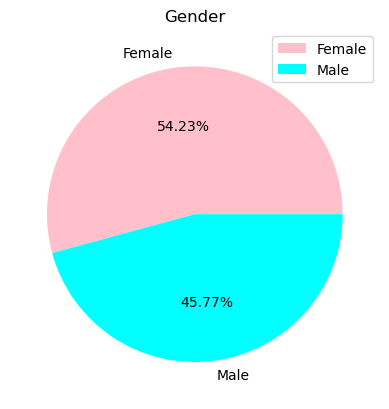

In [17]:
Gender = ["Female", "Male"]
color = ['pink','cyan']
size = customer['Gender'].value_counts() 
plt.pie( size,labels = Gender, colors = color, autopct = '%.2f%%')
plt.title("Gender")
plt.legend()
plt.show()

<Figure size 3000x800 with 0 Axes>

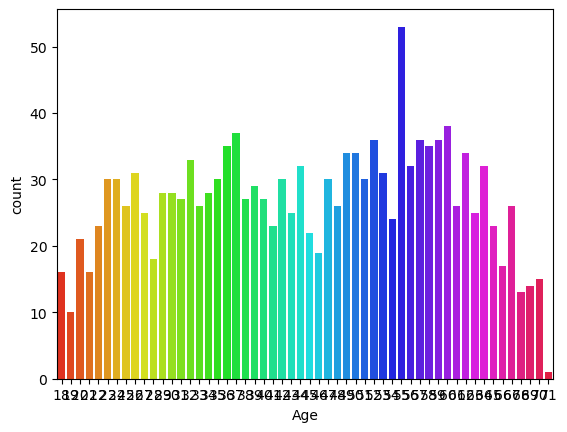

<Figure size 3000x800 with 0 Axes>

In [18]:
sns.countplot(x = customer['Age'], palette = 'hsv')
plt.figure(figsize = (30,8))

In [19]:
new_data = customer.drop(columns=['Like', 'Age', 'VisitFrequency', 'Gender'],axis = 1)

In [20]:
new_data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Agebins
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,61-75
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,50-60
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,61-75
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,61-75
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,36-49
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,36-49
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,36-49
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,50-60
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,36-49


###  convert categorical variables into numerical ones
1. label encoding
2. one hot encoding 

 Label encoding - assign a unique integer to each category and it gives the labels based on the sort order

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
encoder = LabelEncoder()

In [23]:
# for single column
new_data['yummy'] = encoder.fit_transform(new_data['yummy'])

In [24]:
new_data['yummy']

0       0
1       1
2       0
3       1
4       0
       ..
1448    0
1449    1
1450    1
1451    1
1452    0
Name: yummy, Length: 1453, dtype: int32

In [25]:
# encoded for multiple columns 
for column in new_data.columns:
    new_data[column] = encoder.fit_transform(new_data[column])

In [26]:
new_data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Agebins
0,0,1,0,1,0,1,1,0,1,0,0,4
1,1,1,0,1,1,1,1,1,1,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,4
3,1,1,0,1,1,1,1,1,0,0,1,4
4,0,1,0,1,1,1,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,2
1449,1,1,0,1,0,0,1,1,0,1,0,2
1450,1,1,0,1,0,1,0,1,1,0,0,3
1451,1,1,0,0,0,1,1,1,0,1,0,2


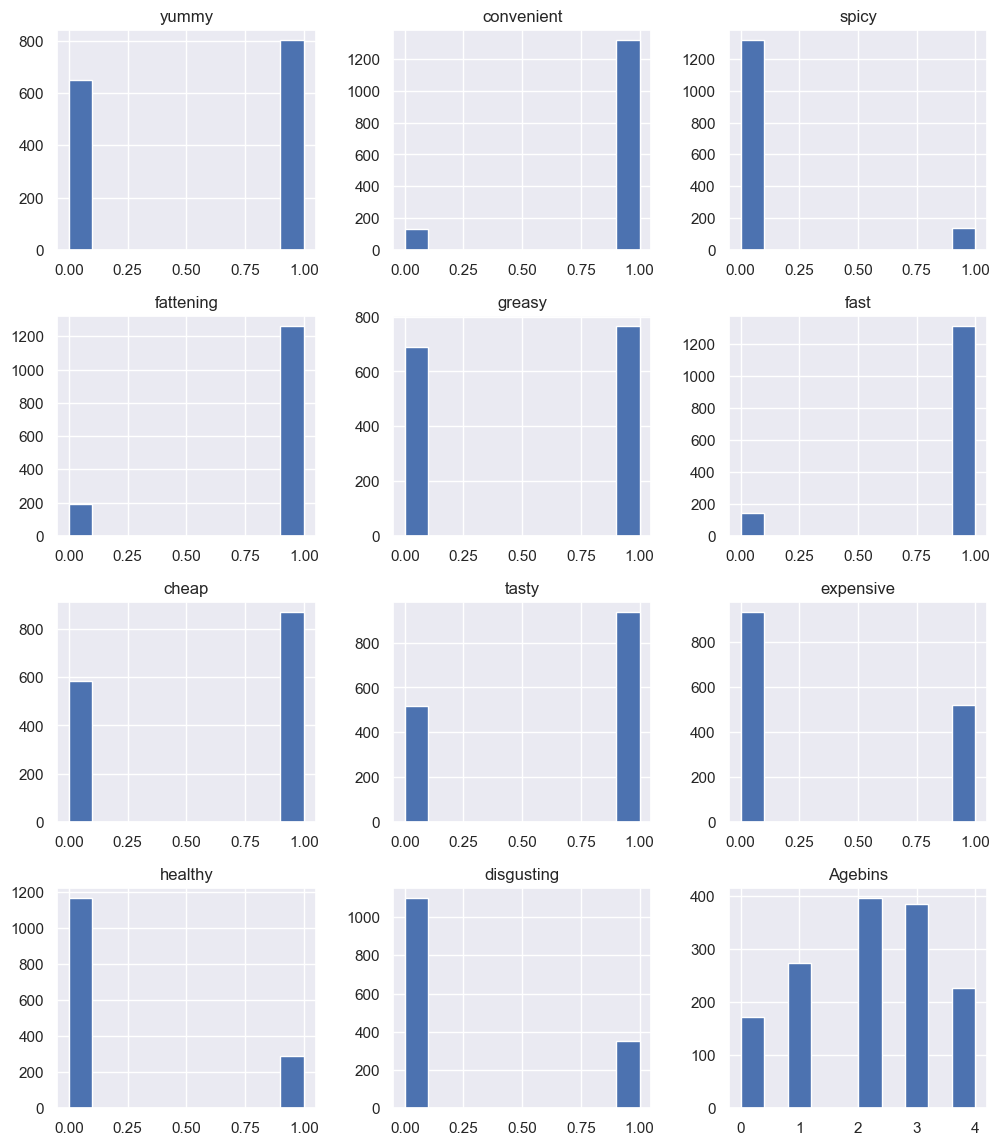

In [27]:
# Histogram of each attributes
sns.set()
plt.rcParams['figure.figsize'] = (12,14)
new_data.hist()
plt.show()


In [28]:
new_data.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Agebins
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,2.150723
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,1.235938
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [29]:
new_data.mean()

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
Agebins       2.150723
dtype: float64

The average values of the transformed binary numeric segmentation variables
indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY,
91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that
McDonald’s food is SPICY.

1. PCA helps them initially understand how customers rate different attributes (yummy, convenient, etc.) of McDonald's.
2. The perceptual map will reveal which attributes tend to be rated together by customers. For example, people who say McDonald's is "yummy" might also say it's "cheap."
3. PCA here isn't used to simply reduce the number of variables (like taste, convenience). That's apparently less effective than clustering raw data.
4. They use PCA to rotate and project the data onto a smaller number of dimensions for the perceptual map, making it easier to visualize.
5. Since they're using binary data (yes/no for attributes), they don't need to standardize it before using PCA.

### PCA implementing 

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA (n_components=11)

In [32]:
data_pca = pca.fit(new_data)

In [33]:
data_pca

PCA(n_components=11)

In [34]:
explained_variance = data_pca.explained_variance_

In [35]:
explained_variance

array([1.58137638, 0.56831041, 0.3607124 , 0.21795567, 0.15904021,
       0.1135998 , 0.09579269, 0.08115512, 0.07524476, 0.07035652,
       0.06192017])

In [36]:
data_pca = pca.fit_transform(new_data)

In [37]:
data_pca

array([[-1.96676322e+00,  2.69391536e-01,  2.99036049e-04, ...,
         1.26586904e-01,  1.81645733e-01,  5.15777985e-01],
       [-6.59786234e-01, -2.25070377e-01,  3.42418361e-01, ...,
        -8.62834260e-02,  1.14269887e-01,  4.91630267e-01],
       [-1.80040733e+00,  2.78518193e-01,  8.45104443e-01, ...,
         4.20613212e-01, -3.25423754e-01,  6.19874008e-02],
       ...,
       [-7.51910300e-01, -2.09378394e-01,  1.14433248e+00, ...,
        -7.13362116e-02,  4.02261787e-02,  5.47736477e-02],
       [ 1.50746326e-01, -1.19211966e+00,  5.83061498e-02, ...,
        -3.26894228e-01,  2.32878210e-02, -2.35835424e-03],
       [ 1.05005467e+00,  1.63022967e+00,  1.44492468e-01, ...,
         3.55360823e-01, -1.39623950e-01, -4.29778871e-01]])

In [38]:
data_pca.shape

(1453, 11)

In [39]:
new_data.shape

(1453, 12)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
scaled_data = scaler.fit_transform(new_data)

In [42]:
scaled_data

array([[-1.11147857,  0.31873518, -0.32134871, ..., -0.49827882,
        -0.56648839,  1.4967694 ],
       [ 0.89970246,  0.31873518, -0.32134871, ..., -0.49827882,
        -0.56648839,  0.6873887 ],
       [-1.11147857,  0.31873518,  3.11188424, ...,  2.00690848,
        -0.56648839,  1.4967694 ],
       ...,
       [ 0.89970246,  0.31873518, -0.32134871, ..., -0.49827882,
        -0.56648839,  0.6873887 ],
       [ 0.89970246,  0.31873518, -0.32134871, ...,  2.00690848,
        -0.56648839, -0.121992  ],
       [-1.11147857,  0.31873518, -0.32134871, ..., -0.49827882,
         1.76526126, -0.9313727 ]])

In [43]:
pca = PCA (n_components=11)

In [44]:
data_pca = pca.fit_transform(scaled_data)

In [45]:
data_pca

array([[ 0.82062895, -1.18007831,  0.68481196, ..., -0.35317579,
         0.40038146,  0.35266544],
       [-0.45481635,  0.80428798, -0.71946545, ...,  1.24496822,
        -0.0493145 ,  0.32294676],
       [ 0.29140532,  0.754376  ,  1.59276826, ...,  0.36474146,
         1.25600112, -1.15307156],
       ...,
       [-0.38823345,  1.57340165,  0.68487259, ..., -0.02712931,
        -0.38850862,  0.17352254],
       [-2.77858295, -0.52311704,  1.87199897, ...,  0.3250972 ,
        -0.24243564,  0.06239161],
       [ 3.42160938,  1.33965802,  0.17625961, ..., -0.48652809,
        -0.85450048, -0.01006332]])

In [46]:
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']

In [47]:
pc_all = pd.DataFrame(data = data_pca ,columns = names )

In [48]:
pc_all

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.820629,-1.180078,0.684812,-0.395583,-1.914774,-0.088934,-0.137491,-0.410346,-0.353176,0.400381,0.352665
1,-0.454816,0.804288,-0.719465,0.249974,-0.556035,0.301035,0.388217,-0.608896,1.244968,-0.049315,0.322947
2,0.291405,0.754376,1.592768,3.770267,-0.921801,-0.169820,-0.528248,-0.995897,0.364741,1.256001,-1.153072
3,-0.040317,-0.884551,-0.998089,0.537920,0.181716,0.376297,0.518180,-1.102090,1.384861,-1.940350,0.336170
4,-0.025498,-1.392631,-0.340572,0.246770,0.685165,-1.142189,-1.574575,-0.957639,-0.042695,1.646489,0.059479
...,...,...,...,...,...,...,...,...,...,...,...
1448,3.475144,1.034471,0.487618,-0.339499,0.531147,0.934952,-2.091411,-0.083011,-0.100635,-0.955998,0.067580
1449,-1.568653,0.336443,1.185708,-0.745689,1.668021,1.940882,-1.734918,-1.514704,-1.018778,-0.110641,-0.049349
1450,-0.388233,1.573402,0.684873,-0.399171,-1.733023,0.155643,0.768504,-0.446104,-0.027129,-0.388509,0.173523
1451,-2.778583,-0.523117,1.871999,-0.365356,1.284562,-1.121523,-0.267957,0.350812,0.325097,-0.242436,0.062392


In [49]:
# standard deviation ((from PC1 to PC11 ))
print("Standard Deviation")
np.std(pc_all)

Standard Deviation


pc1     1.678891
pc2     1.294477
pc3     1.253132
pc4     1.041626
pc5     1.019232
pc6     0.909362
pc7     0.848577
pc8     0.792020
pc9     0.744756
pc10    0.722731
pc11    0.550831
dtype: float64

In [50]:
# standard deviation 
print("Standard Deviation")
std_dev=[]
for i in names:
     std_dev.append(np.std(pc_all[i]))
np.array(std_dev)

Standard Deviation


array([1.67889088, 1.29447707, 1.25313237, 1.0416261 , 1.01923168,
       0.90936246, 0.84857699, 0.79201988, 0.74475645, 0.72273109,
       0.55083068])

In [51]:
# variance (from PC1 to PC11 )(pov)
print("Proportion of Variance")
pca.explained_variance_ratio_

Proportion of Variance


array([0.23488955, 0.13963924, 0.13086173, 0.09041541, 0.08656943,
       0.06891167, 0.06000691, 0.05227462, 0.04622185, 0.04352835,
       0.02528454])

In [52]:
#cumulative proportion (from PC1 to PC11 ) - adding all the pov - variance is o to 1 
print("Cumulative proportion")
np.cumsum(pca.explained_variance_ratio_)


Cumulative proportion


array([0.23488955, 0.37452879, 0.50539052, 0.59580593, 0.68237536,
       0.75128704, 0.81129395, 0.86356857, 0.90979042, 0.95331877,
       0.97860331])

In [53]:
new_data.columns.values

array(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Agebins'],
      dtype=object)

In [54]:
# correlation coefficient between original variable and the component 
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1,num_pc))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list , loadings)))
loadings_df['Features'] = new_data.columns.values
loadings_df = loadings_df.set_index('Features')
loadings_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Features,,,,,,,,,,,
yummy,-0.415185,0.374449,-0.057461,0.008429,0.149177,0.139812,0.230420,-0.124365,0.096272,-0.220063,0.713849
convenient,-0.310369,0.053581,-0.192195,0.114669,-0.442032,-0.114769,-0.715591,0.105655,0.030581,-0.341265,0.031964
spicy,-0.018769,-0.017282,0.131446,0.873682,-0.009942,0.244307,0.070132,0.283615,-0.252136,0.083048,0.034030
fattening,0.169976,0.097069,-0.538033,0.074560,-0.251718,0.257452,0.025390,-0.598221,-0.388106,0.148543,-0.016676
greasy,0.257224,0.130730,-0.429444,0.287354,0.289171,-0.047713,-0.192177,-0.022624,0.688977,0.224697,0.023504
fast,-0.212535,-0.171907,-0.269454,0.179841,-0.337231,-0.690515,0.462106,0.030834,0.060045,0.091681,0.018765
cheap,-0.285147,-0.505315,-0.266760,0.036089,0.293028,0.118103,0.002259,-0.057583,-0.052836,-0.054324,0.050167
tasty,-0.431876,0.318024,-0.056139,0.079533,0.065518,0.192698,0.255235,-0.119393,0.196542,-0.267451,-0.686937
expensive,0.285033,0.537625,0.207260,0.098454,-0.204418,-0.203371,0.050421,-0.089908,-0.008163,-0.011895,0.025171


<Axes: ylabel='Features'>

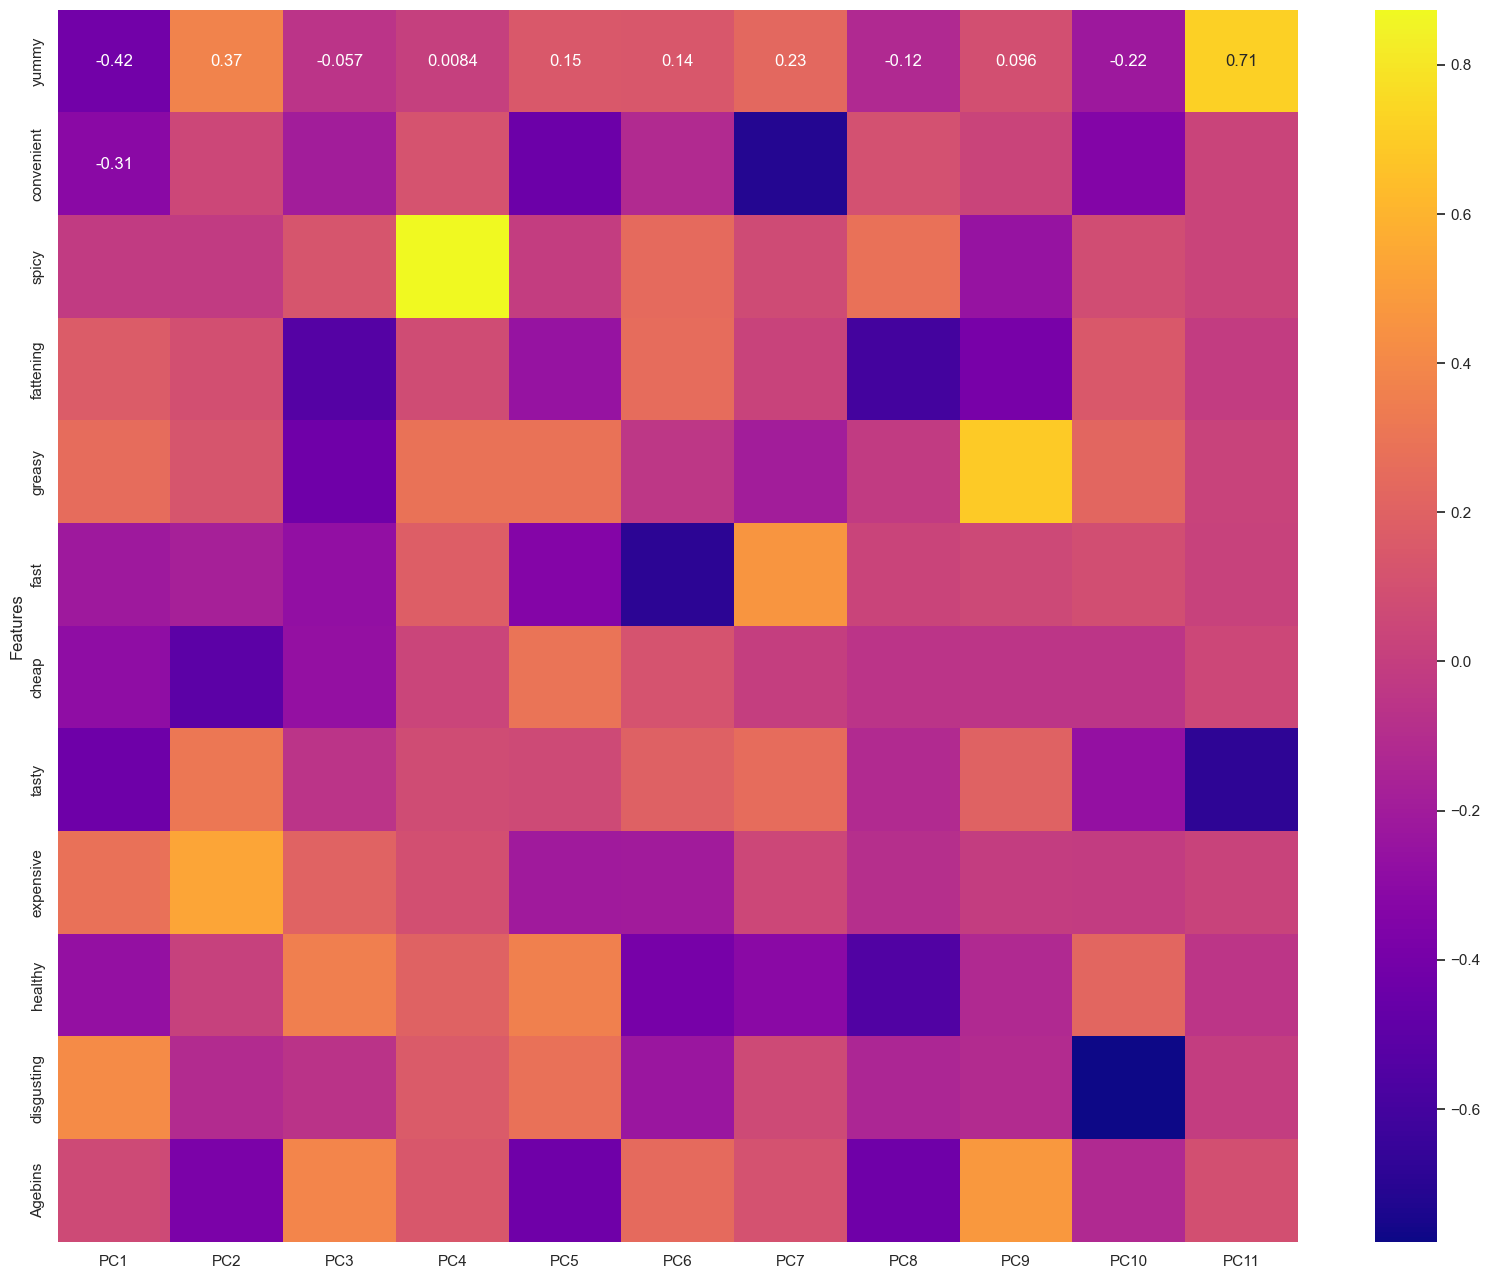

In [55]:
plt.figure(figsize=(20,16))
sns.heatmap(data= loadings_df,cmap='plasma',annot = True)

In [56]:
from bioinfokit.visuz import cluster

In [57]:
pca_scores = PCA().fit_transform(data_pca)

In [58]:
pca_scores

array([[ 0.82062895, -1.18007831,  0.68481196, ..., -0.35317579,
         0.40038146,  0.35266544],
       [-0.45481635,  0.80428798, -0.71946545, ...,  1.24496822,
        -0.0493145 ,  0.32294676],
       [ 0.29140532,  0.754376  ,  1.59276826, ...,  0.36474146,
         1.25600112, -1.15307156],
       ...,
       [-0.38823345,  1.57340165,  0.68487259, ..., -0.02712931,
        -0.38850862,  0.17352254],
       [-2.77858295, -0.52311704,  1.87199897, ...,  0.3250972 ,
        -0.24243564,  0.06239161],
       [ 3.42160938,  1.33965802,  0.17625961, ..., -0.48652809,
        -0.85450048, -0.01006332]])

In [59]:
pc_list

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']

In [60]:
pca.explained_variance_ratio_

array([0.23488955, 0.13963924, 0.13086173, 0.09041541, 0.08656943,
       0.06891167, 0.06000691, 0.05227462, 0.04622185, 0.04352835,
       0.02528454])

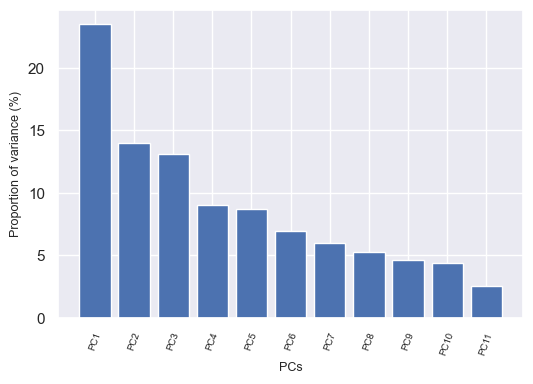

In [61]:
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True)

####
PC1 has large variance

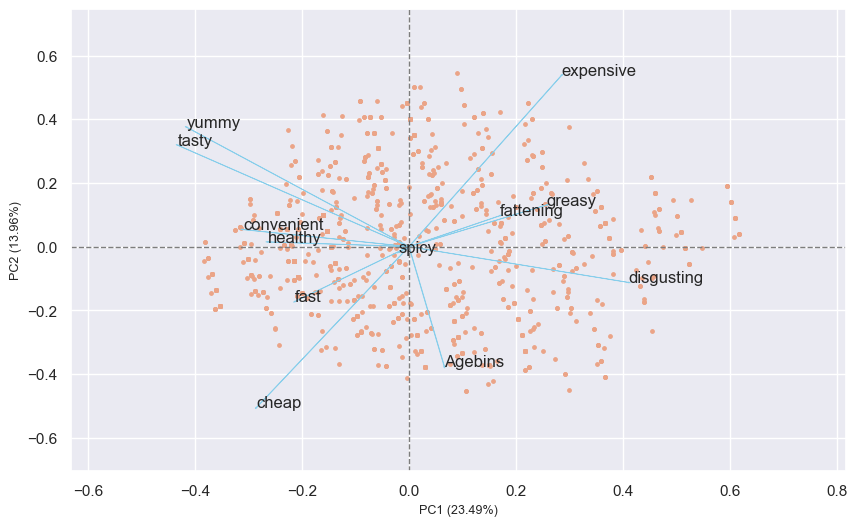

In [62]:
# get 2D biplot 
cluster.biplot(cscore = pca_scores ,loadings = loadings , labels = new_data.columns.values , var1 =round(pca.explained_variance_ratio_[0]*100,2),var2 = round(pca.explained_variance_ratio_[1]*100,2),show =True,dim=(10,6))

#### 
PC1 and PC2 ahs large variance where maximum number of point lie on the axis that's why this is the more important axis for us

###
Now we use k-means clustring algorithm to formed a cluster for same time of customer so each cluster is formed on the basis of distortin score elbow method so we can easily decide how to find the optimer number of cluster based on the dissimilarity between user using elbow method . we use different value of K and whichever value of K Distortion score is high we pick that one according to value of K we decide number of cluster

## Step 5: Extracting Segments
1. using K-means
2.using mixtures of distribution 
3.Using Mixtures of Regression Models

5.1 Using k-Means

In [63]:
from sklearn.cluster import KMeans
model = KMeans()

In [64]:
# helps you find the optimal k value by analyzing WCSS across different k
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++',random_state = 0)
    kmeans.fit(pc_all)
    wcss.append(kmeans.inertia_)

In [65]:
wcss

[17062.927232651382,
 14075.814790185568,
 12569.961503451956,
 11325.232538225906,
 10177.607698978874,
 9450.694678451573,
 8631.995977569482,
 8050.171101475417,
 7627.010718853414,
 7364.753917867185]

In [66]:
sum = 0
for i in wcss:
    sum= sum + i
    i = i+1
print(sum)
print(sum/10)

106336.17015771077
10633.617015771077


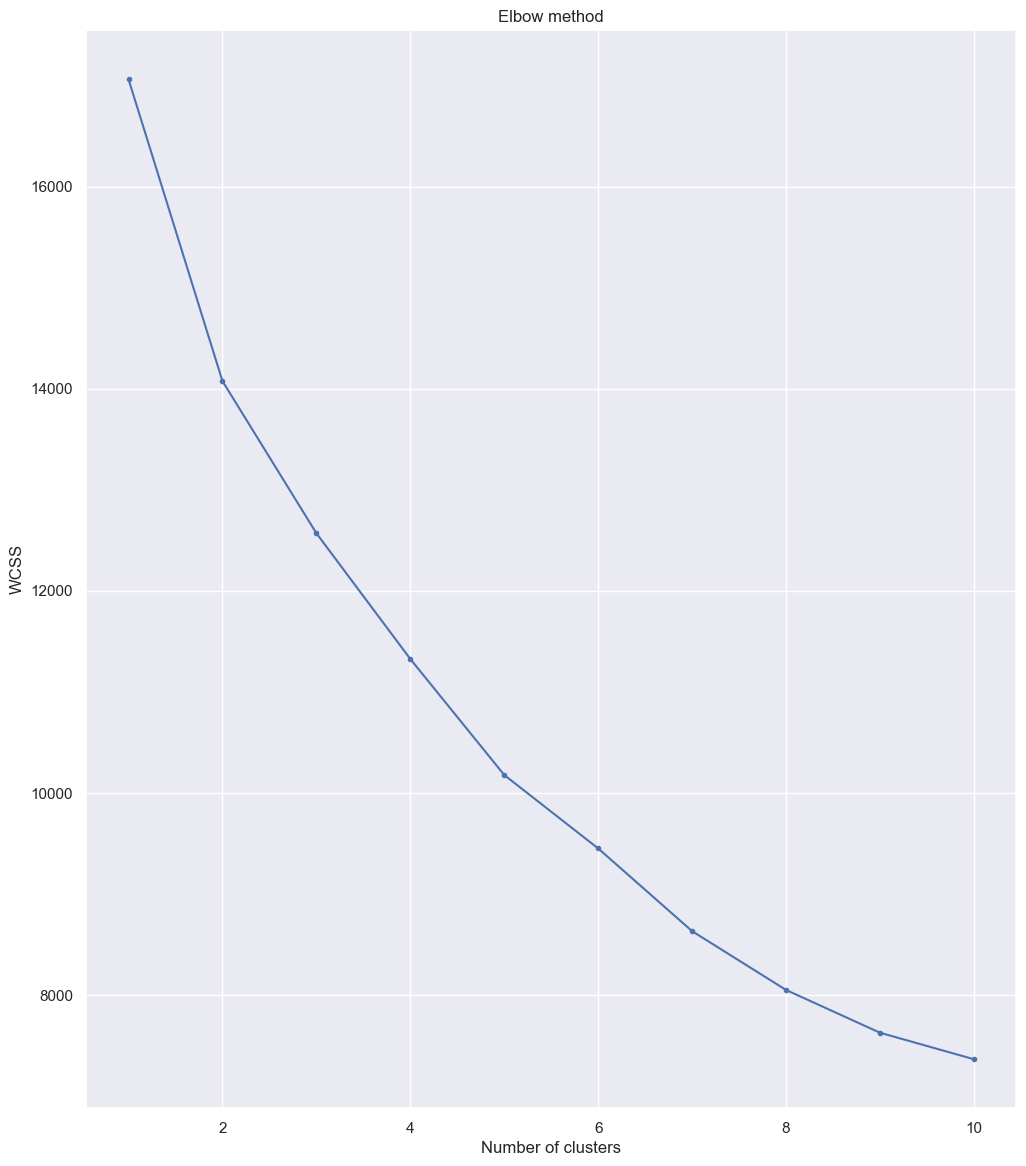

In [67]:
sns.set()
plt.plot(range(1,11),wcss,marker = '.')
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# Applying the elbow method 

In [68]:
# using k-means clustering analysis for extracting segments 
model = KMeans()

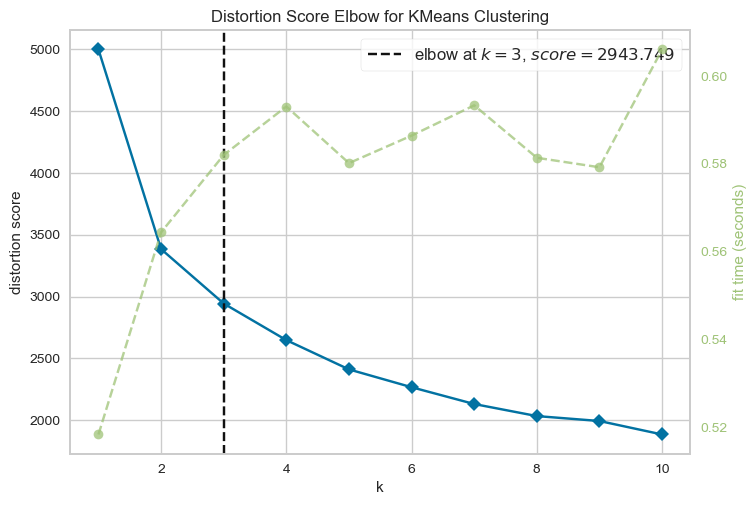

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(model , k=(1,11)).fit(new_data)
visualizer.show()

##
According to Elbow method Optimal value of k is 4 so we create 4 cluster that contain four different type of customer behavious that is helpful for target segmentation

# Applying the K-Means Clustering Algorithm

In [70]:
# K-means clustering 
kmeans = KMeans(n_clusters = 4 ,init = 'k-means++',random_state = 0)
kmeans.fit(new_data)

KMeans(n_clusters=4, random_state=0)

In [71]:
# gives within-cluster sum of squares(WCSS)
print('WCSS:', kmeans.inertia_)

WCSS: 2642.325540013547


In [72]:
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('number of iterations: ',kmeans.n_iter_)


number of iterations:  9


In [73]:
# location of the centroids on each cluster
print("Cluster Centroids " , kmeans.cluster_centers_)

Cluster Centroids  [[0.06303725 0.81948424 0.13467049 0.90830946 0.61031519 0.86246418
  0.54154728 0.252149   0.38108883 0.0773639  0.42120344 3.41260745]
 [0.22222222 0.83660131 0.07189542 0.92156863 0.74509804 0.82679739
  0.38562092 0.29411765 0.56862745 0.09150327 0.49346405 1.75163399]
 [0.90163934 0.98594848 0.1030445  0.74941452 0.17330211 0.95316159
  0.7470726  0.97892272 0.19906323 0.36065574 0.01405152 2.80562061]
 [0.88409704 0.95956873 0.06199461 0.91913747 0.67385445 0.93530997
  0.65768194 0.91644205 0.34501348 0.21563342 0.13207547 0.53908356]]


In [74]:
# checking the each cluster size 
from collections import Counter
print("cluster size " , Counter(kmeans.labels_))

cluster size  Counter({2: 427, 3: 371, 0: 349, 1: 306})


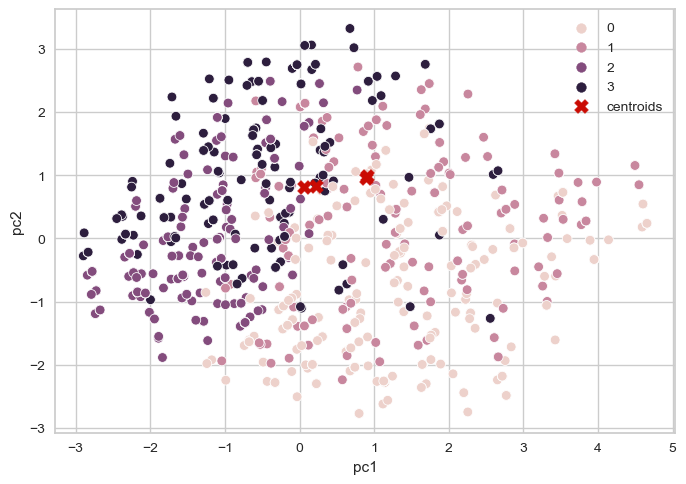

In [75]:
# cluster visualisation 
sns.scatterplot(data = pc_all , x ="pc1" , y = "pc2" ,hue = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker="X", c="r", s=100, label="centroids")
plt.legend()
plt.show()

## Profiling Segments 

In [76]:
# plotting the dendogram 
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram


In [77]:
from sklearn.cluster import AgglomerativeClustering

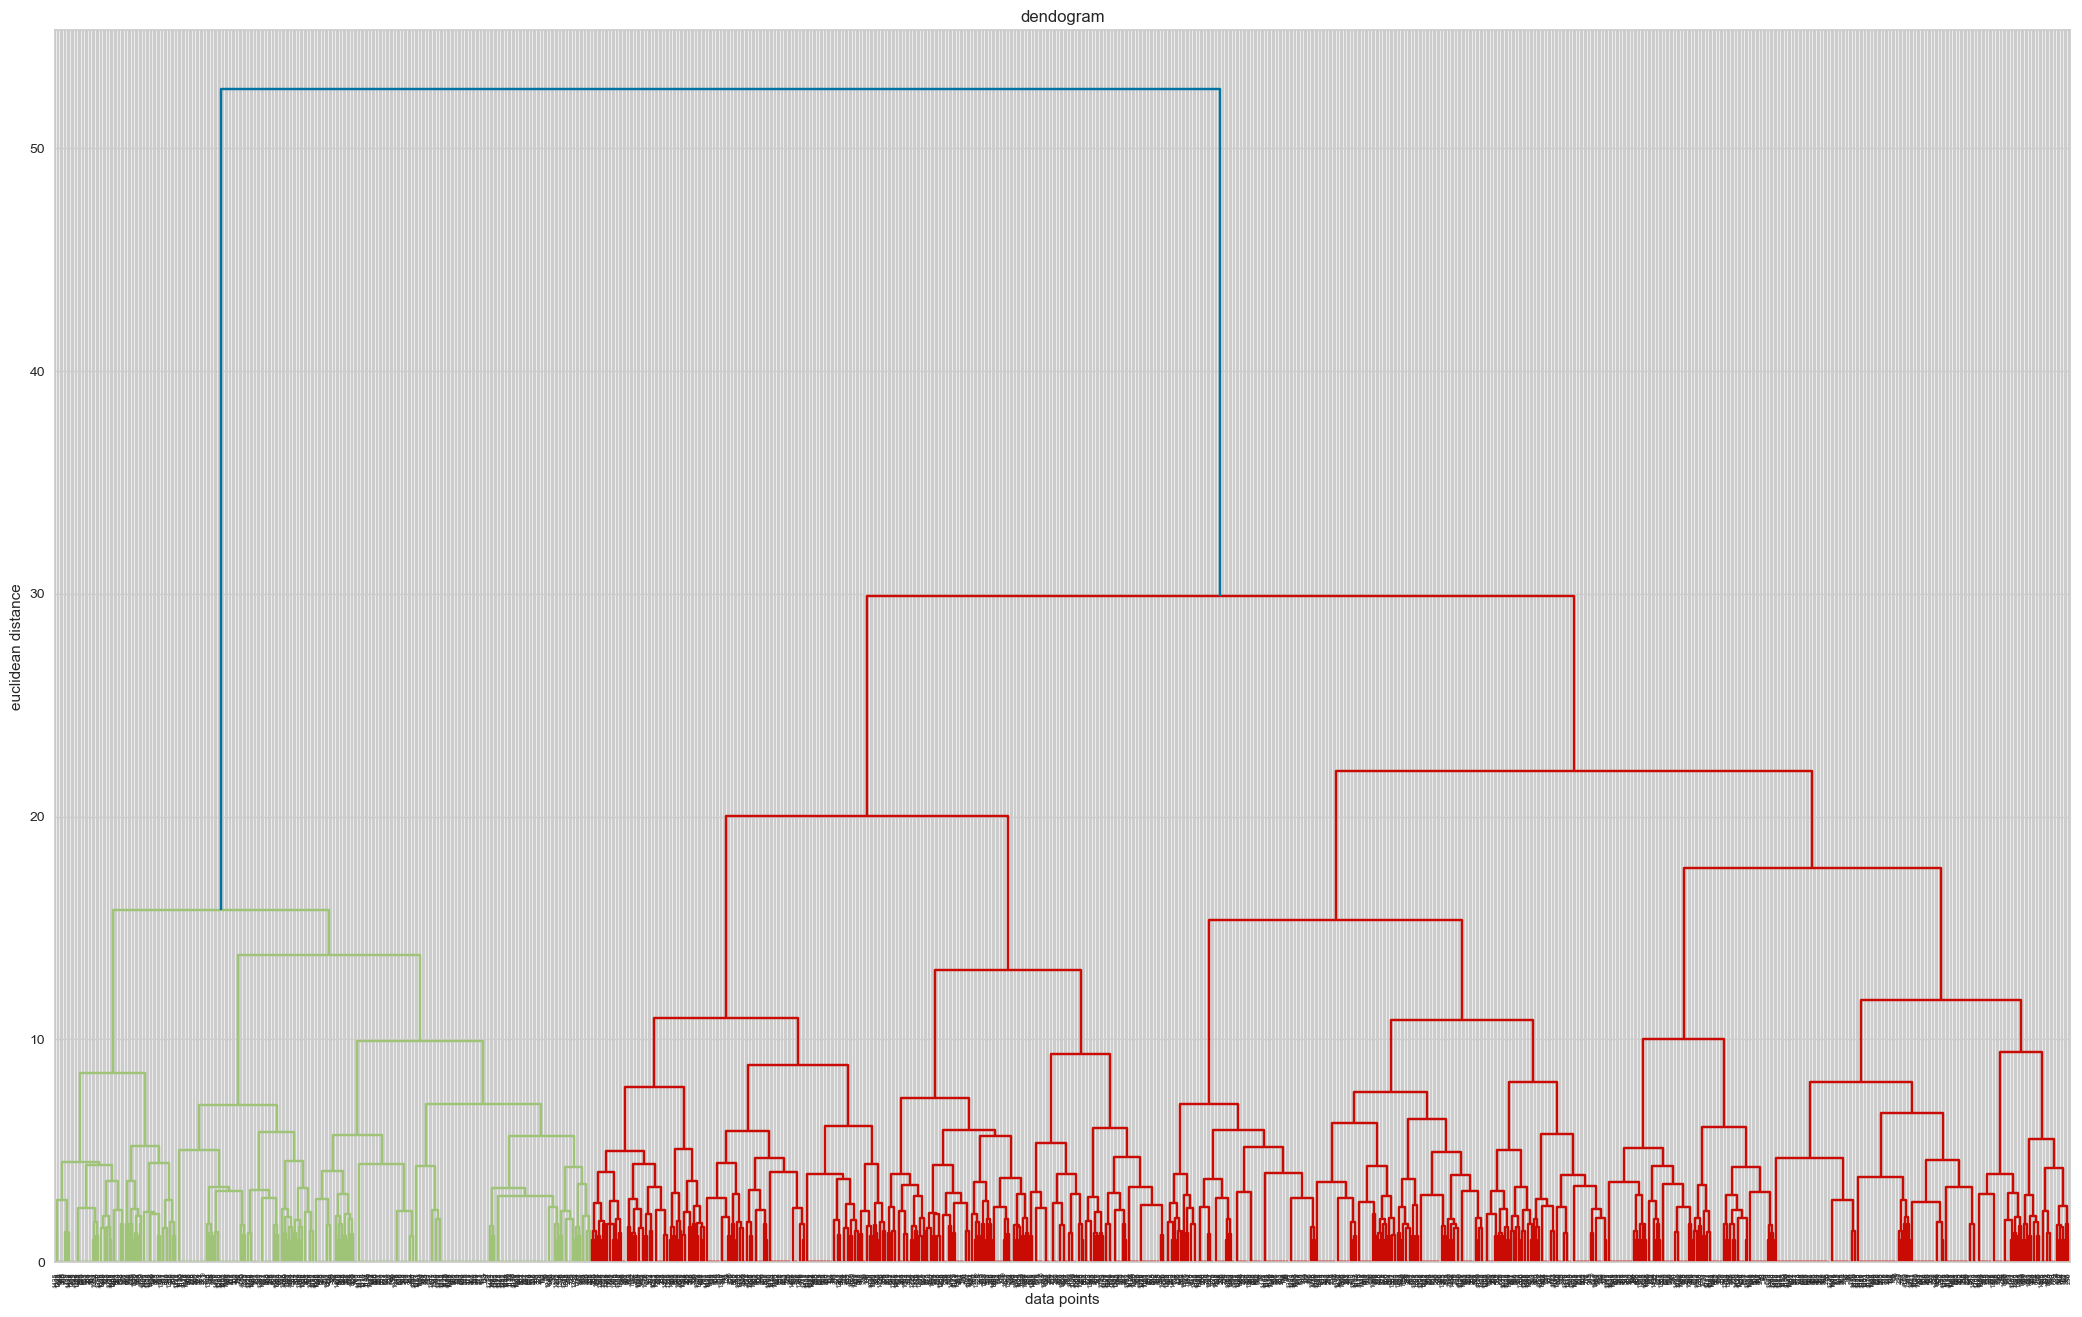

In [78]:
# Computes hierarchical clustering using the linkage function
plt.figure(figsize = (26,16))
dendrogram = sch.dendrogram(sch.linkage(new_data , method = 'ward'))
plt.title("dendogram")
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [79]:
#agglomerative 
from sklearn.cluster import AgglomerativeClustering 
cluster = AgglomerativeClustering(n_clusters = 4 , affinity = "deprecated",linkage = 'ward')
cluster.fit_predict(new_data)


array([0, 2, 0, ..., 0, 2, 0], dtype=int64)

#  Describing segments 

In [80]:
from statsmodels .graphics.mosaicplot import mosaic
from itertools import product 

In [81]:
new_data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Agebins
0,0,1,0,1,0,1,1,0,1,0,0,4
1,1,1,0,1,1,1,1,1,1,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,4
3,1,1,0,1,1,1,1,1,0,0,1,4
4,0,1,0,1,1,1,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,2
1449,1,1,0,1,0,0,1,1,0,1,0,2
1450,1,1,0,1,0,1,0,1,1,0,0,3
1451,1,1,0,0,0,1,1,1,0,1,0,2


In [82]:
customer

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Agebins
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,61-75
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,50-60
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,61-75
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,61-75
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,36-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male,36-49
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female,36-49
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female,50-60
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male,36-49


In [83]:
# adding to customer 
customer["cluster_number"] = kmeans.labels_

In [84]:
customer

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Agebins,cluster_number
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,61-75,0
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,50-60,2
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,61-75,0
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,61-75,0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,36-49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male,36-49,1
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female,36-49,2
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female,50-60,2
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male,36-49,2


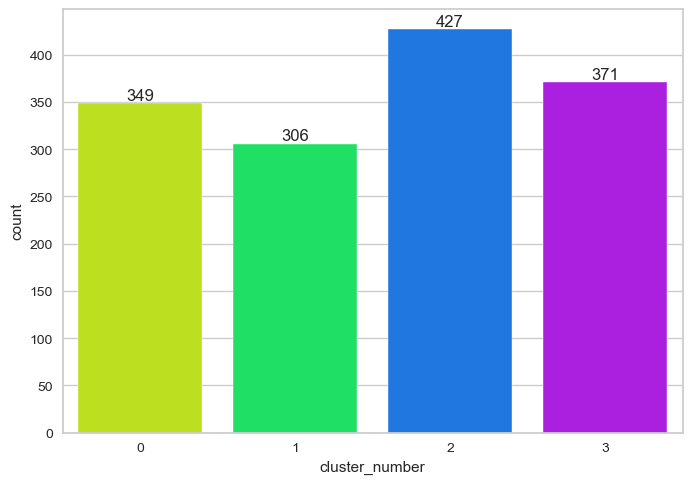

In [85]:

f = sns.countplot(x=customer["cluster_number"], palette='hsv')
f.bar_label(f.containers[0])
plt.rcParams['figure.figsize'] = (25, 20)
# print(len(dataset['cluster_num'][1]))

In [86]:
customer['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [87]:
customer['Like'] = customer['Like'].replace(to_replace = {"I hate it!-5" : "-5" , "I love it!+5" : "+5" })

In [88]:
customer['Like'].value_counts()

Like
+3    229
+2    187
0     169
+4    160
+1    152
-5    152
+5    143
-3     73
-4     71
-2     59
-1     58
Name: count, dtype: int64

In [89]:
crosstab = pd.crosstab(customer['cluster_number'],customer['Like'])
# Reordering cols 
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_number,,,,,,,,,,,
0,85,44,38,24,23,63,34,21,9,7,1
1,58,23,28,24,18,49,30,38,24,10,4
2,2,2,2,3,6,32,49,78,104,88,61
3,7,2,5,8,11,25,39,50,92,55,77


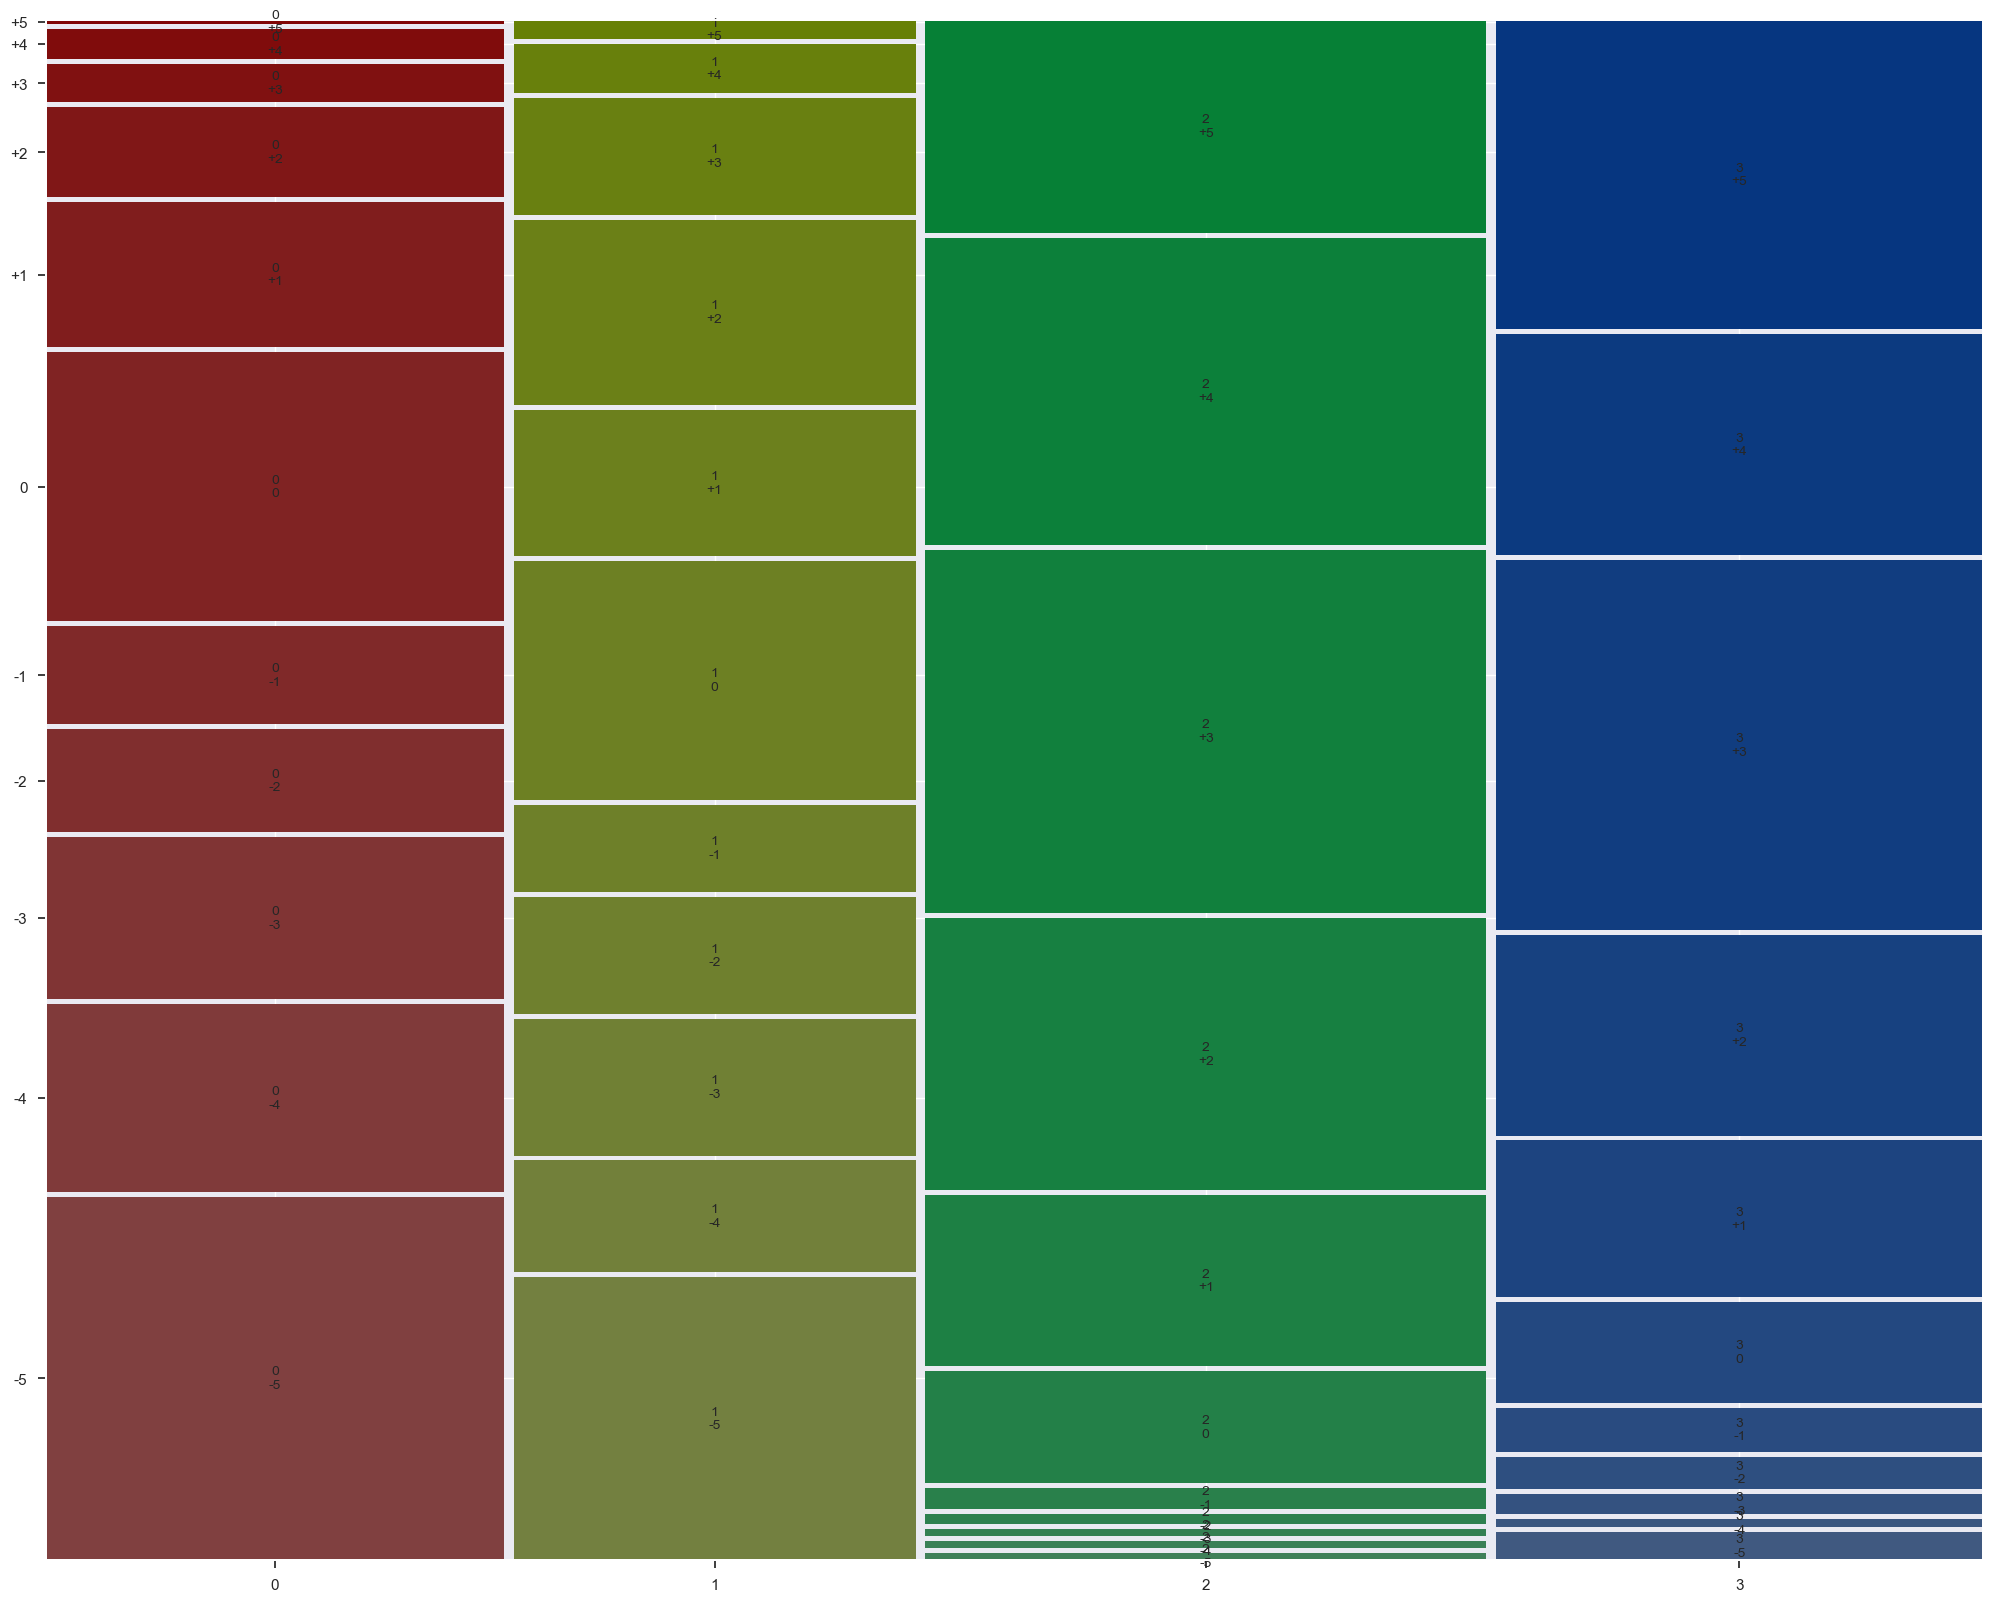

In [90]:
sns.set()
mosaic(crosstab.stack())
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['font.size'] = 5
plt.show()


In [91]:
crosstab = pd.crosstab(customer["cluster_number"],customer['Gender'])
# reordering cols 
crosstab = crosstab[['Female','Male']]
crosstab

Gender,Female,Male
cluster_number,,
0,189,160
1,143,163
2,251,176
3,205,166


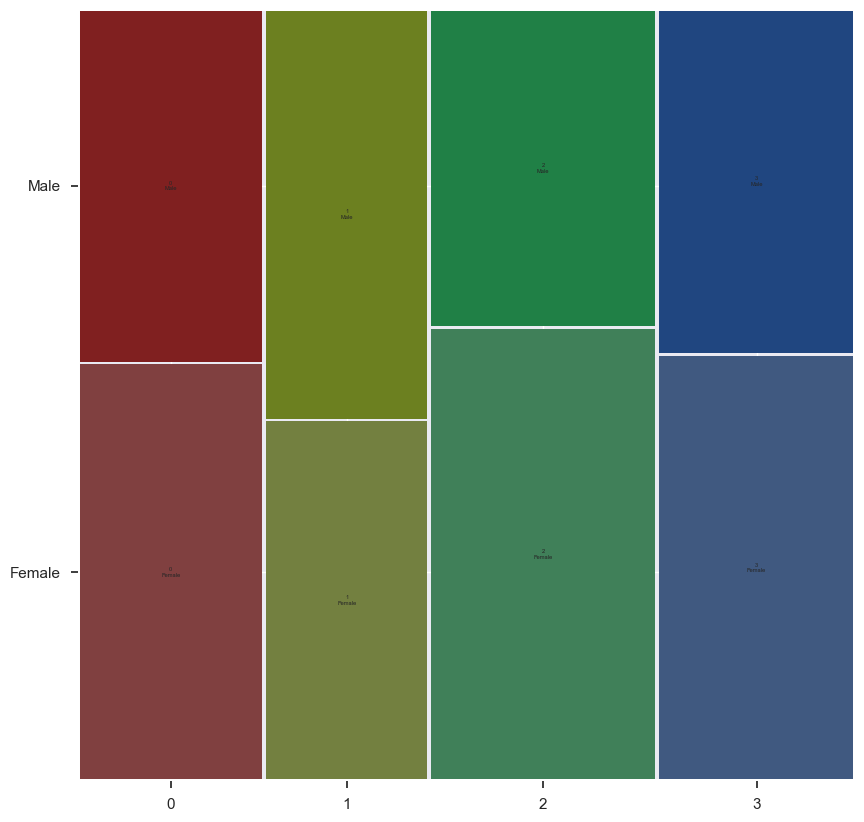

In [92]:
mosaic(crosstab.stack())
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['font.size'] = 100
plt.show()


<Axes: xlabel='cluster_number', ylabel='Age'>

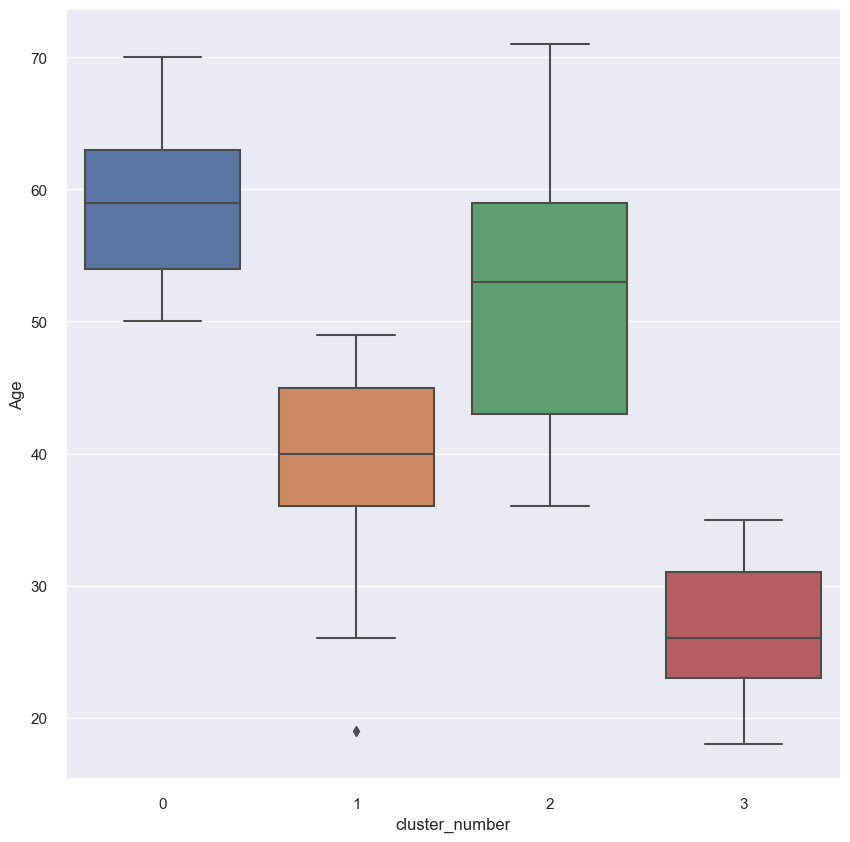

In [93]:
sns.boxplot(x= customer['cluster_number'] , y = customer['Age'] , data = customer)

# Selecting the Target Segment 

In [95]:
# calculating the mean of 'VisitFrequency'
customer["VisitFrequency"] = encoder.fit_transform(customer["VisitFrequency"])


In [96]:
customer['VisitFrequency'].value_counts()

VisitFrequency
3    439
0    342
5    252
4    235
2    131
1     54
Name: count, dtype: int64

In [97]:
visit = customer.groupby('cluster_number')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_number,VisitFrequency
0,0,2.638968
1,1,2.722222
2,2,2.498829
3,3,2.727763


In [98]:
# calculating the mean of 'Like'
customer['Like'] = encoder.fit_transform(customer['Like'])

In [99]:
Like = customer.groupby('cluster_number')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_number,Like
0,0,6.693410
1,1,5.745098
2,2,2.833724
3,3,3.164420


In [100]:
# calculating the mean of 'Gender'
customer['Gender']= encoder.fit_transform(customer['Gender'])
Gender = customer.groupby('cluster_number')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_number,Gender
0,0,0.458453
1,1,0.532680
2,2,0.412178
3,3,0.447439


In [101]:
segment = Gender.merge(Like , on = 'cluster_number').merge(visit, on = 'cluster_number')
segment 

,cluster_number,Gender,Like,VisitFrequency
0,0,0.458453,6.693410,2.638968
1,1,0.532680,5.745098,2.722222
2,2,0.412178,2.833724,2.498829
3,3,0.447439,3.164420,2.727763


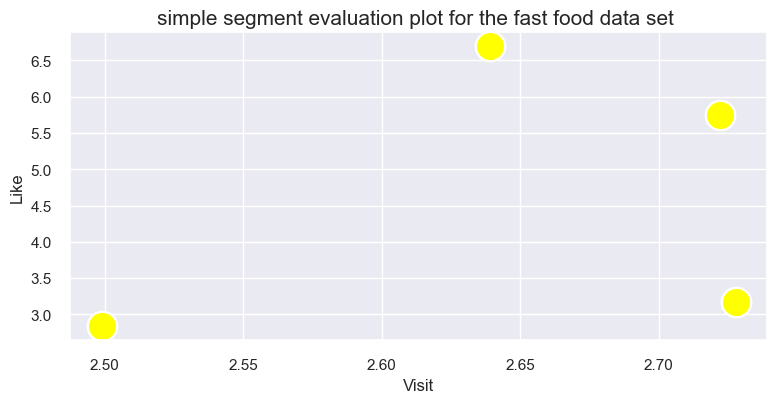

In [102]:


# targetting segments 
plt.figure(figsize = (9,4))
sns.scatterplot(x = 'VisitFrequency',y = 'Like' , data = segment , s= 450, color = "yellow")
plt.title("simple segment evaluation plot for the fast food data set " , fontsize = 15)
plt.xlabel("Visit" , fontsize = 12)
plt.ylabel("Like" , fontsize = 12)
plt.show()


### 
NOw The conclusion of segmentation is based on the Visitfrequency and Like we can select our cluster and according to cluster audience we target that audince like age and gender also taste is involve for target the audience . The target audienced that is highly focused for us is that visitfrequency mean between 2.50 to 2.60 followed by other

# Customising the Marketing Mix

##### The marketing mix is designed. If, for example, McDonald’s managers decide to focus on segment 3 (young customers who like McDonald’s, think the food is yummy and tasty, but perceive it as pretty expensive), they could choose to offer a MCSUPERBUDGET line to cater specifically to the price expectations of this segment (4Ps: Price). The advantage of such an approach might be that members of segment 3 develop to become loyal customers who, as they start earning more money, will not care about the price any more and move to the regular McDonald’s range of products.

 # 10. Evaluation and Monitoring

##
* After market segmentation is complete and marketing activities are implemented, the strategy's success needs continuous evaluation.
Monitoring is crucial to identify changes within and outside existing segments:
Within segments: Customers' needs or characteristics may evolve (e.g., segment 3 members earning more).

* External market: New competitors or market trends might emerge.
By monitoring these changes, McDonald's management can adapt marketing strategies and tactics to maintain effectiveness in the evolving market landscape.

* By understanding the market landscape, businesses can make informed decisions about their segmentation strategies, marketing tactics, and how to position themselves competitively.